In [9]:
from train.services import *
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import Model, Sequential
from time import time
plt.rcParams['figure.figsize'] = [15, 5]

In [3]:
x_train, x_test, y_train, y_test = Loader.load_digit_dataset(data_dir='out')

In [4]:
# Dataset params
num_classes = 10
size = x_train.shape[1]

# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    16000 samples
Test set:     4000 samples
Sample dims:  (16000, 28, 28)


In [5]:
inputs = Input(shape=(size, size, 1))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = BatchNormalization()(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
net = Dropout(0.3)(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

2024-12-23 15:24:22.354660: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,874 (50.29 KB)

 Trainable params: 12,842 (50.16 KB)

 Non-trainable params: 32 (128.00 B)

In [7]:
epochs = 25
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.4264 - loss: 1.7499 - val_accuracy: 0.1031 - val_loss: 2.1536
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.8756 - loss: 0.4041 - val_accuracy: 0.6288 - val_loss: 1.3697
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9420 - loss: 0.1970 - val_accuracy: 0.8800 - val_loss: 0.6631
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9684 - loss: 0.1075 - val_accuracy: 0.9775 - val_loss: 0.2230
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9770 - loss: 0.0785 - val_accuracy: 0.9906 - val_loss: 0.0814
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9844 - loss: 0.0598 - val_accuracy: 0.9844 - val_loss: 0.0659
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9868 - loss: 0.0451 - val_accuracy: 0.9894 - val_loss: 0.0343
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.9889 - loss: 0.0371 - val_accu

In [6]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])



Train Acc      0.9984027743339539
Validation Acc 0.9981250166893005


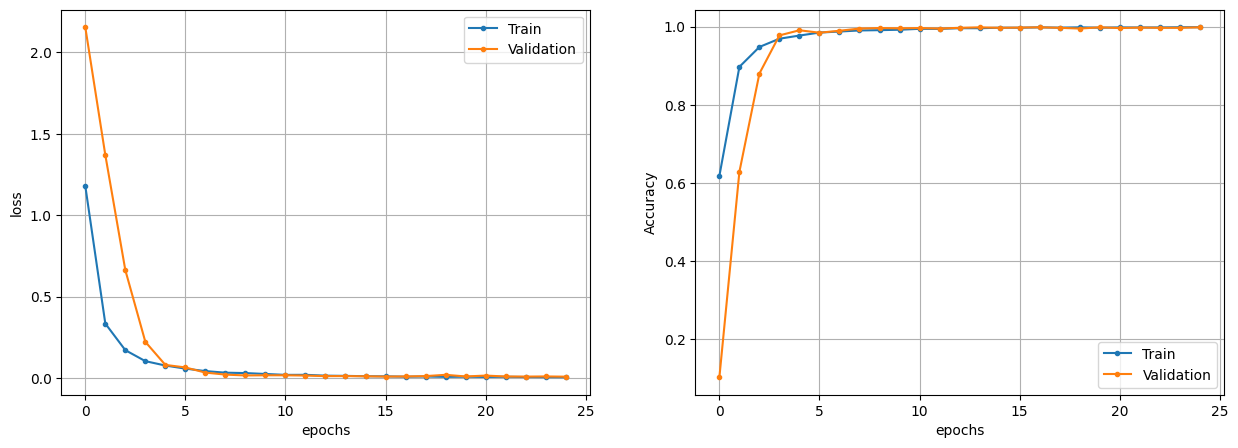

In [10]:
plot_history(history)

In [ ]:
model.save('../data/model.h5')

In [17]:
model_2 = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(size, size, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(num_classes, activation='softmax')
])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,560 (150.63 KB)

 Trainable params: 12,842 (50.16 KB)

 Non-trainable params: 32 (128.00 B)

 Optimizer params: 25,686 (100.34 KB)

In [14]:
epochs = 25
batch_size = 128

model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
history_2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.4587 - loss: 1.6870 - val_accuracy: 0.1994 - val_loss: 2.1278
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.8440 - loss: 0.5177 - val_accuracy: 0.3550 - val_loss: 1.6998
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9078 - loss: 0.3075 - val_accuracy: 0.6069 - val_loss: 1.1441
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9361 - loss: 0.2175 - val_accuracy: 0.8644 - val_loss: 0.5209
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.9487 - loss: 0.1718 - val_accuracy: 0.9344 - val_loss: 0.2581
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9568 - loss: 0.1428 - val_accuracy: 0.9644 - val_loss: 0.1308
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9589 - loss: 0.1325 - val_accuracy: 0.9781 - val_loss: 0.1045
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9672 - loss: 0.1099 - val_accu

Train Acc      0.9818750023841858
Validation Acc 0.981249988079071


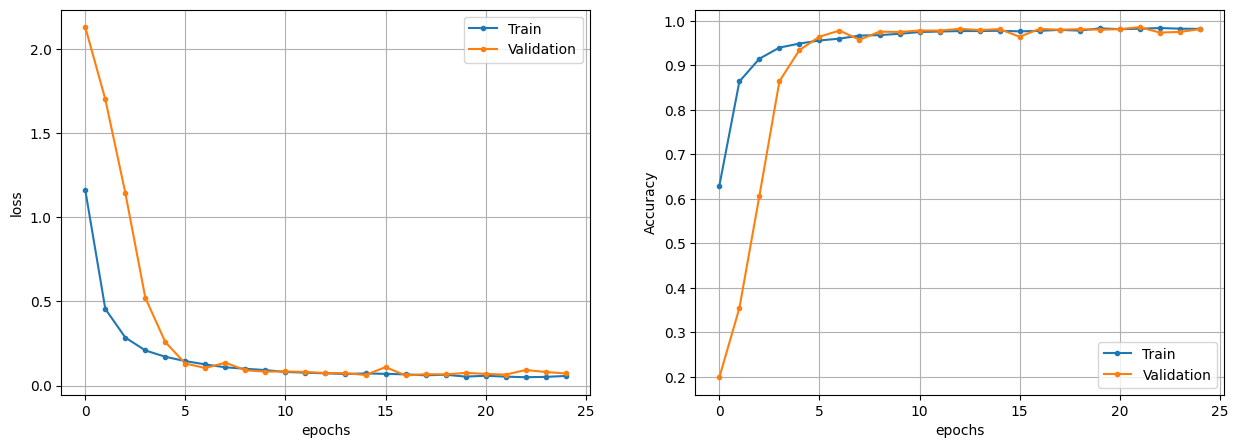

In [15]:
plot_history(history_2)

In [ ]:
model_2.save('../data/simple_model.h5')